# TRABAJO GRUPAL CORONAVIRUS

Group B: India, Peru, EEUU, Francia and Spain:

Kapil
María
Juan

---------------------

## 1. Libraries

In [2]:
import pandas as pd
import numpy as np
import sys 
import os 
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
sys.path = list(set(sys.path)) 

In [4]:
import src.utils.visualization_tb as vis 
import src.utils.folders_tb as fol
import src.utils.mining_data_tb as mng
import src.utils.apis_tb as api

## 2.Data Wrangling

In [5]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv") 
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [6]:
data.shape

(61486, 55)

## 3. Data Cleaning

In [7]:
#Selecting assigned group B countries
data_sc = mng.country_select(df=data, count_list=['India', 'Peru', 'United States', 'France', 'Spain'])
data_sc.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24790,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24791,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24792,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24793,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24794,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [8]:
#Percentage of missing values.  This will help us decide which columns we have selected.
miss = data_sc.isnull().sum() * 100 / len(data_sc)
miss.sort_values()

iso_code                                  0.000000
hospital_beds_per_thousand                0.000000
female_smokers                            0.000000
diabetes_prevalence                       0.000000
cardiovasc_death_rate                     0.000000
gdp_per_capita                            0.000000
aged_70_older                             0.000000
aged_65_older                             0.000000
median_age                                0.000000
population_density                        0.000000
population                                0.000000
life_expectancy                           0.000000
human_development_index                   0.000000
continent                                 0.000000
location                                  0.000000
date                                      0.000000
total_cases_per_million                   0.056593
total_cases                               0.056593
new_cases                                 0.113186
new_cases_per_million          

In [9]:
# Function used to see the different values inside each column. If there were only five values, that column was not included. 
data_sc["aged_65_older"].unique()

array([ 5.989,  7.151, 15.413, 19.718, 19.436])

In [10]:
#Selecting the columns to analyse.
data_final = data_sc[["iso_code","continent","location","date","total_cases","total_cases_per_million","new_cases_smoothed","new_cases_smoothed_per_million","new_deaths_smoothed","new_deaths_smoothed_per_million","total_deaths","total_deaths_per_million","life_expectancy","stringency_index","new_deaths"]]
data_final

,iso_code,continent,location,date,total_cases,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed,new_deaths_smoothed_per_million,total_deaths,total_deaths_per_million,life_expectancy,stringency_index,new_deaths
24790,IND,Asia,India,2020-01-30,1.0,0.001,NaN,NaN,NaN,NaN,NaN,NaN,69.66,10.19,NaN
24791,IND,Asia,India,2020-01-31,1.0,0.001,NaN,NaN,NaN,NaN,NaN,NaN,69.66,10.19,NaN
24792,IND,Asia,India,2020-02-01,1.0,0.001,NaN,NaN,NaN,NaN,NaN,NaN,69.66,10.19,NaN
24793,IND,Asia,India,2020-02-02,2.0,0.001,NaN,NaN,NaN,NaN,NaN,NaN,69.66,10.19,NaN
24794,IND,Asia,India,2020-02-03,3.0,0.002,NaN,NaN,NaN,NaN,NaN,NaN,69.66,10.19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51856,ESP,Europe,Spain,2021-01-18,2336451.0,49972.449,32095.571,686.466,213.429,4.565,53769.0,1150.021,83.56,71.30,455.0
51857,ESP,Europe,Spain,2021-01-19,2370742.0,50705.871,33360.286,713.516,212.857,4.553,54173.0,1158.662,83.56,71.30,404.0
51858,ESP,Europe,Spain,2021-01-20,2412318.0,51595.106,33747.000,721.787,251.286,5.375,54637.0,1168.586,83.56,71.30,464.0
51859,ESP,Europe,Spain,2021-01-21,2456675.0,52543.822,34958.286,747.694,280.286,5.995,55041.0,1177.227,83.56,NaN,404.0


In [11]:
#Changing date column to datatime
mng.changing_dates(df=data_final,name_column="date")  

In [12]:
#Information of our columns to see if changes of format are needed
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 24790 to 51860
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         1767 non-null   object        
 1   continent                        1767 non-null   object        
 2   location                         1767 non-null   object        
 3   date                             1767 non-null   datetime64[ns]
 4   total_cases                      1766 non-null   float64       
 5   total_cases_per_million          1766 non-null   float64       
 6   new_cases_smoothed               1740 non-null   float64       
 7   new_cases_smoothed_per_million   1740 non-null   float64       
 8   new_deaths_smoothed              1740 non-null   float64       
 9   new_deaths_smoothed_per_million  1740 non-null   float64       
 10  total_deaths                     1620 non-null   float6

## 4.Creating an API.  

### We are creating the API in the file ../src/services/apis/server.py

4.1 - Create a dataframe with the mean new deaths of our selected countries.

4.2 - Transform this dataframe to a json format

4.3 - Create API with the json 

4.4 - Send the API to another group

### API workflow:

![API](../resources/API_info.png)

## 5. Visualization

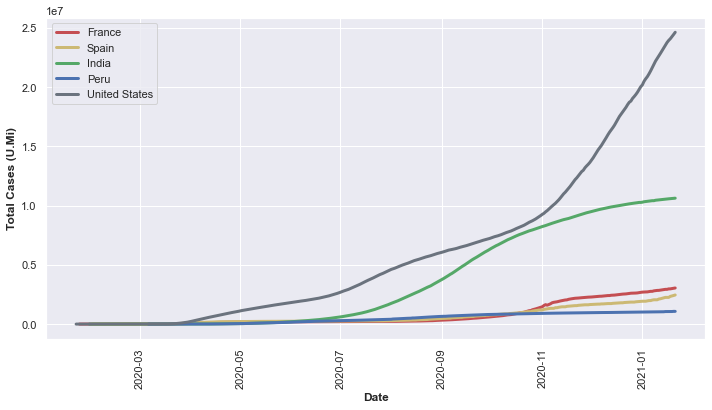

In [21]:
# Seaborn Visualization
sns.set()

# Creating the graph
y_plot = data_final[(data_final["location"] == "France")].total_cases
x_plot = data_final[(data_final["location"] == "France")].date

y_plot2 = data_final[(data_final["location"] == "Spain")].total_cases
x_plot2 = data_final[(data_final["location"] == "Spain")].date

y_plot3 = data_final[(data_final["location"] == "India")].total_cases
x_plot3 = data_final[(data_final["location"] == "India")].date

y_plot4 = data_final[(data_final["location"] == "Peru")].total_cases
x_plot4 = data_final[(data_final["location"] == "Peru")].date

y_plot5 = data_final[(data_final["location"] == "United States")].total_cases
x_plot5 = data_final[(data_final["location"] == "United States")].date

plt.figure(figsize=(vis.cm_to_inch(30),vis.cm_to_inch(15)))
plt.plot(x_plot.values, y_plot, color='r', linewidth= 3, label="France")
plt.plot(x_plot2.values, y_plot2, color='y', linewidth= 3, label="Spain")
plt.plot(x_plot3.values, y_plot3, color='g', linewidth= 3, label="India")
plt.plot(x_plot4.values, y_plot4, color='b', linewidth= 3, label="Peru")
plt.plot(x_plot5.values, y_plot5,  color='#6B737E', linewidth= 3, label="United States")

# Labels 
plt.xlabel("Date", weight="bold")
plt.ylabel("Total Cases (U.Mi)", weight="bold")
plt.xticks(rotation="90")
plt.legend()

# Saving the graph in a folder - ¿Cómo lo podemos guardar con una ruta que no cambie dependiendo del ordenador?
name_fig = "\\resources\\Total_Cases.png"

plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')

# Showing the graph
plt.show()

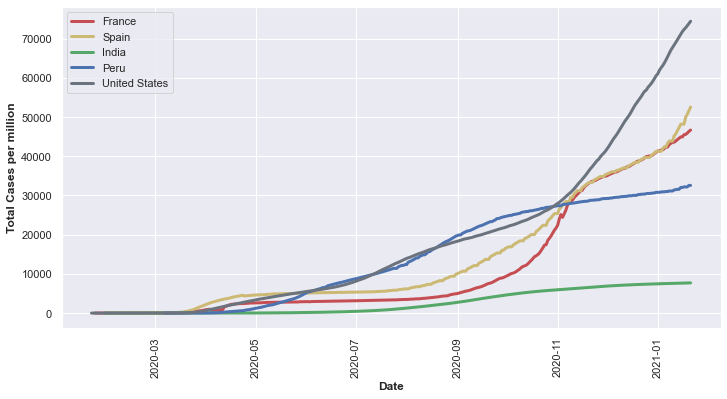

In [23]:
# Seaborn Visualization
sns.set()

# Creating the graph
y_plot = data_final[(data_final["location"] == "France")].total_cases_per_million
x_plot = data_final[(data_final["location"] == "France")].date

y_plot2 = data_final[(data_final["location"] == "Spain")].total_cases_per_million
x_plot2 = data_final[(data_final["location"] == "Spain")].date

y_plot3 = data_final[(data_final["location"] == "India")].total_cases_per_million
x_plot3 = data_final[(data_final["location"] == "India")].date

y_plot4 = data_final[(data_final["location"] == "Peru")].total_cases_per_million
x_plot4 = data_final[(data_final["location"] == "Peru")].date

y_plot5 = data_final[(data_final["location"] == "United States")].total_cases_per_million
x_plot5 = data_final[(data_final["location"] == "United States")].date

plt.figure(figsize=(vis.cm_to_inch(30),vis.cm_to_inch(15)))
plt.plot(x_plot.values, y_plot, color='r', linewidth= 3, label="France")
plt.plot(x_plot2.values, y_plot2, color='y', linewidth= 3, label="Spain")
plt.plot(x_plot3.values, y_plot3, color='g', linewidth= 3, label="India")
plt.plot(x_plot4.values, y_plot4, color='b', linewidth= 3, label="Peru")
plt.plot(x_plot5.values, y_plot5, color='#6B737E', linewidth= 3, label="United States")

# Labels
plt.xlabel("Date", weight="bold")
plt.ylabel("Total Cases per million", weight="bold")
plt.xticks(rotation="90")
plt.legend()

# Saving the graph in a folder - ¿Cómo lo podemos guardar con una ruta que no cambie dependiendo del ordenador?
name_fig = "\\resources\\Total_Cases_per_million.png"

plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')

# Showing the graph
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

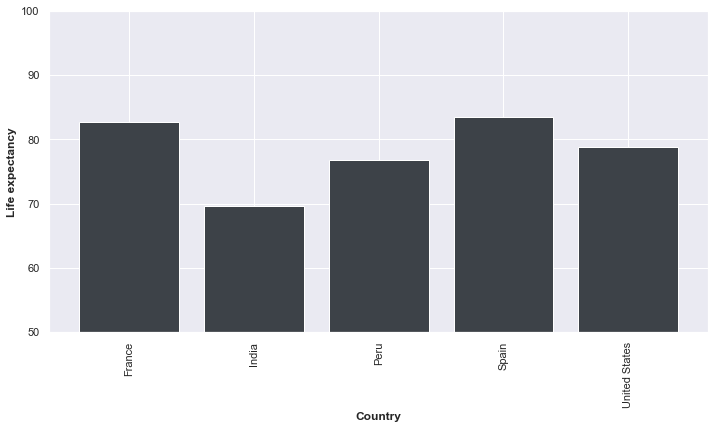

In [22]:
# Seaborn Visualization
sns.set()

# Creating the graph
groupby_data = data_final.groupby("location").mean().sort_values(by="location")


plt.figure(figsize=(vis.cm_to_inch(30), vis.cm_to_inch(15)))
plt.ylim([50, 100])
plt.bar(x=groupby_data.index.values, height=groupby_data.life_expectancy, facecolor='#3d4248')

# Labels
plt.xlabel("Country", weight="bold")
plt.ylabel("Life expectancy", weight="bold")
plt.xticks(rotation="90")

# Saving the graph in a folder - ¿Cómo lo podemos guardar con una ruta que no cambie dependiendo del ordenador?
name_fig = "\\resources\\Life_Expectancy.png"

plt.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')

# Showing the graph
plt.show

## Correlation Matrix

,total_cases,total_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed,new_deaths_smoothed_per_million,total_deaths,total_deaths_per_million,life_expectancy,stringency_index,new_deaths
total_cases,1.000000,0.568053,0.883274,0.537812,0.726328,0.144429,0.943532,0.196726,-0.220579,0.101785,0.656483
total_cases_per_million,0.568053,1.000000,0.543733,0.777534,0.408334,0.379185,0.568838,0.848008,0.235422,0.181501,0.352484
new_cases_smoothed,0.883274,0.543733,1.000000,0.664843,0.843485,0.213721,0.864211,0.179799,-0.151598,0.120743,0.777043
new_cases_smoothed_per_million,0.537812,0.777534,0.664843,1.000000,0.518645,0.483771,0.533770,0.545373,0.277515,0.169951,0.471693
new_deaths_smoothed,0.726328,0.408334,0.843485,0.518645,1.000000,0.437976,0.742454,0.067555,-0.116940,0.219689,0.909667
new_deaths_smoothed_per_million,0.144429,0.379185,0.213721,0.483771,0.437976,1.000000,0.128139,0.289042,0.277355,0.358702,0.375228
total_deaths,0.943532,0.568838,0.864211,0.533770,0.742454,0.128139,1.000000,0.289286,-0.108302,-0.075031,0.674778
total_deaths_per_million,0.196726,0.848008,0.179799,0.545373,0.067555,0.289042,0.289286,1.000000,0.473616,-0.075125,0.058160
life_expectancy,-0.220579,0.235422,-0.151598,0.277515,-0.116940,0.277355,-0.108302,0.473616,1.000000,-0.182861,-0.118197
stringency_index,0.101785,0.181501,0.120743,0.169951,0.219689,0.358702,-0.075031,-0.075125,-0.182861,1.000000,0.110850


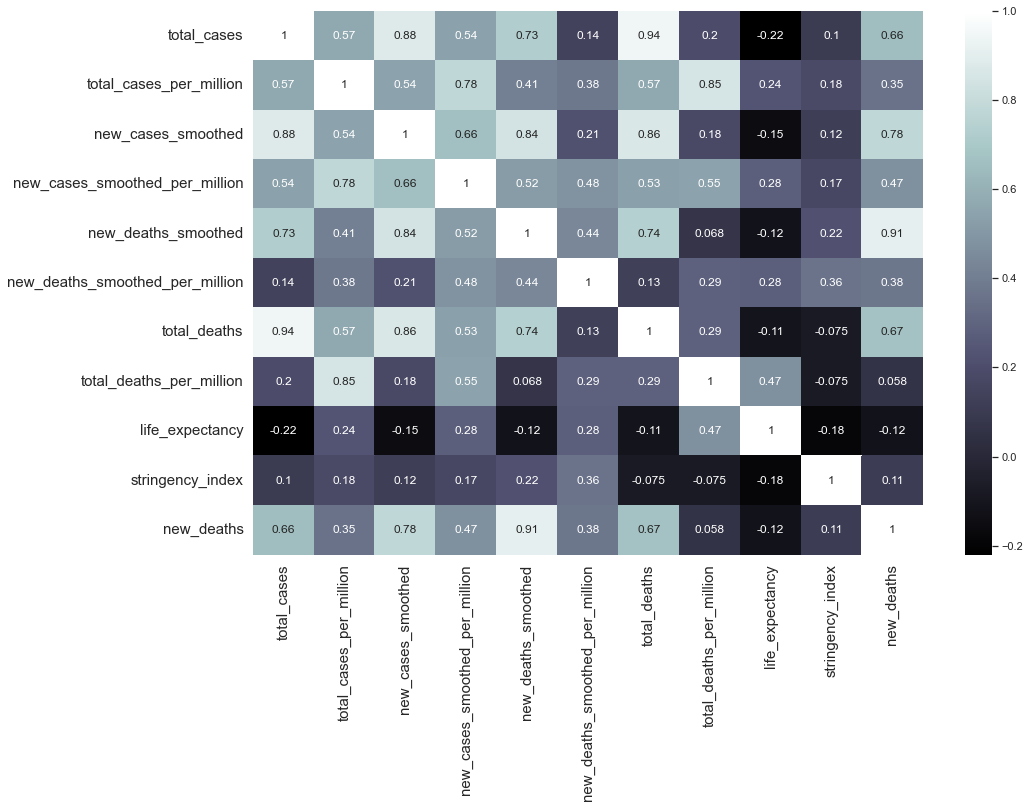

In [24]:
# Creating the graph
plt.figure(figsize=(15,10))
correlation_covid = data_final.corr()
heatmap_covid = sns.heatmap(correlation_covid, cmap="bone",annot=True)
fig_corr_covid = heatmap_covid.get_figure()

# Labels
plt.yticks(va="center", rotation = 0, fontsize=15)
plt.xticks(fontsize=15)

# Showing the chart
correlation_covid

In [25]:
#Saving the correlation matrix 
name_fig = "\\resources\\Correlation_matrix_covid_dataset_Bgroup.png"

fig_corr_covid.savefig(root_path + name_fig, dpi=300, bbox_inches='tight')